In [1]:
from traverse_headers import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Insret your kaspad DB path here (must be a copy w/o kaspad running over it)
db_path = r'C:\Users\msssu\AppData\Local\Kaspad\kaspa-mainnet\ibd-pruning-bug\kaspad-test2\kaspa-mainnet\datadir2'
store = Store(db_path)

In [ ]:
grouped = load_dag(store, process_data=True, print_freq=20000)

In [ ]:
# print(sorted(len(v) for v in grouped.values()))

In [5]:
data = sorted(len(v) for v in grouped.values())
grouped_sorted = sorted(grouped.items(), key=lambda kvp: len(kvp[1]))
# grouped_sorted

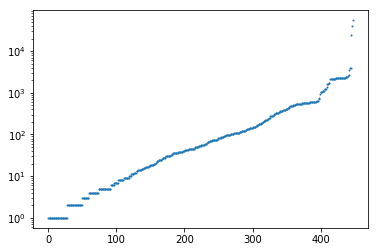

In [6]:
plt.figure()
plt.scatter(np.arange(0, len(data)), data, s=1)
plt.yscale('log')
# plt.show()

In [7]:
top_miner_timestamps = grouped_sorted[-1][1]
# top_miner_timestamps

In [8]:
top_miner_timestamps = sorted(top_miner_timestamps)
intervals = []
for i in range(len(top_miner_timestamps) - 1):
    intervals.append(top_miner_timestamps[i+1] - top_miner_timestamps[i])
intervals = sorted(intervals)
print(intervals[-10])
intervals = intervals[:-10] 

41595


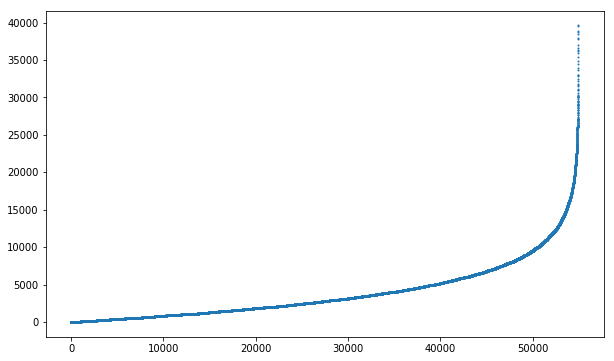

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(0, len(intervals)), intervals, s=1)
plt.show()

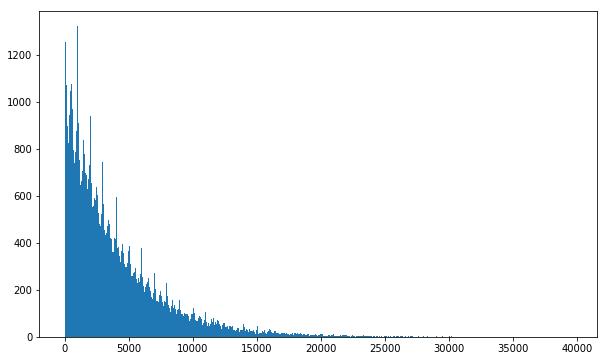

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(intervals, bins=500)
plt.show()

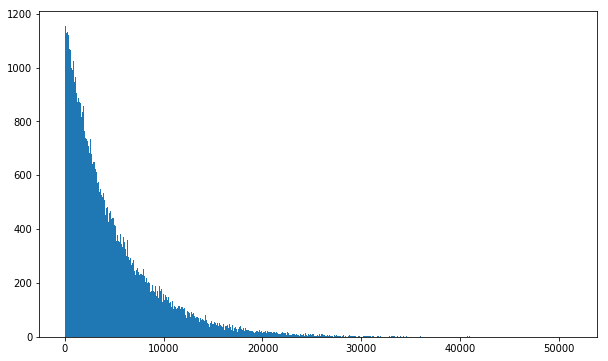

In [22]:
sample = np.random.exponential(len(store.blocks)/len(top_miner_timestamps), len(top_miner_timestamps))*1000
plt.figure(figsize=(10, 6))
plt.hist(sample, bins=500)
plt.show()

In [ ]:
# store.close()